## Project 3: Analysis of Iris Flower Dataset 
##### By Delice Mambi-Lambu

##### Abstract & Introduction
This project is about the data analysis of the Iris Flower Data Set - a multivarite dataset that consits of 5 attributes and 150 records. The Iris data set is famously known for being one of the datasets mostly used for statistical analysis as historicaly the data swt was introduced by Ronald Fisher in his 1936 paper. In this project we will be mainly use this dataset as a classification problem in machine learning. The goal is to use four features to classify the instance. 

The attributes we will be exploring: 

#### The Features 
* X1 - eepal_length
* X2 - sepal_width
* X3 - petal_length
* X4 - petal_width 

#### The Target
* Y - species




##### Citation

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

#### Importing Libaries 

In [1]:
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# Generating our New GG-PLOT Style
mpl.style.use('ggplot')

In [3]:
from pathlib import Path 
print(Path.cwd())

C:\Users\delic\OneDrive\Documents\Data Science Projects\Classfication


#### Data Importing

In [4]:
path = r'C:\Users\delic\OneDrive\Documents\Data Science Projects\Classfication\IRIS.csv'

df = pd.read_csv(path)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Data Cleaning 

In [5]:
# Re-naming columns - please refer to above notes
print(df.columns)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['X1', 'X2', 'X3', 'X4', 'Y'], dtype='object')


In [6]:
# Find out more data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      150 non-null    float64
 1   X2      150 non-null    float64
 2   X3      150 non-null    float64
 3   X4      150 non-null    float64
 4   Y       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Evaluating Missing Data
missingData = df.isnull()
missingData.head()

,X1,X2,X3,X4,Y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [8]:
for col in missingData.columns.values.tolist():
    print(col)
    print(missingData[col].value_counts())
    print('')

X1
X1
False    150
Name: count, dtype: int64

X2
X2
False    150
Name: count, dtype: int64

X3
X3
False    150
Name: count, dtype: int64

X4
X4
False    150
Name: count, dtype: int64

Y
Y
False    150
Name: count, dtype: int64



In [9]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64

In [10]:
# Exporting Data For R 

path = r'C:\Users\delic\OneDrive\Documents\Data Science Projects\Classfication\IRIS2.csv'

df.to_csv(path, index = False)

#### Exploratory Data Analysis 

In [11]:
# Lets try to understand our data
print(df.head())
df.describe()

    X1   X2   X3   X4            Y
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


,X1,X2,X3,X4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# The values for each classifier 
df.groupby(by = 'Y').mean()

,X1,X2,X3,X4
Y,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


So we find that for each classier the closer the values for the  are to features the more likely the values of the features will match the averages of the clasifier.

In [13]:
# Equal Ditribution amongst all three classifiers 
df['Y'].value_counts()

Y
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Data Visualisation

We're gpomg to do a box plot for all three classofiers for all for Features.

In [14]:
#Spit dataframe by classifier 

df1 = df[df['Y'] == 'Iris-setosa'] 
print(df1.head())

df2 = df[df['Y'] == 'Iris-versicolor']
print(df2.head())

df3 = df[df['Y'] == 'Iris-virginica'] 
print(df3.head())

    X1   X2   X3   X4            Y
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
     X1   X2   X3   X4                Y
50  7.0  3.2  4.7  1.4  Iris-versicolor
51  6.4  3.2  4.5  1.5  Iris-versicolor
52  6.9  3.1  4.9  1.5  Iris-versicolor
53  5.5  2.3  4.0  1.3  Iris-versicolor
54  6.5  2.8  4.6  1.5  Iris-versicolor
      X1   X2   X3   X4               Y
100  6.3  3.3  6.0  2.5  Iris-virginica
101  5.8  2.7  5.1  1.9  Iris-virginica
102  7.1  3.0  5.9  2.1  Iris-virginica
103  6.3  2.9  5.6  1.8  Iris-virginica
104  6.5  3.0  5.8  2.2  Iris-virginica


Text(0, 0.5, 'Values - Length/Width (cm)')

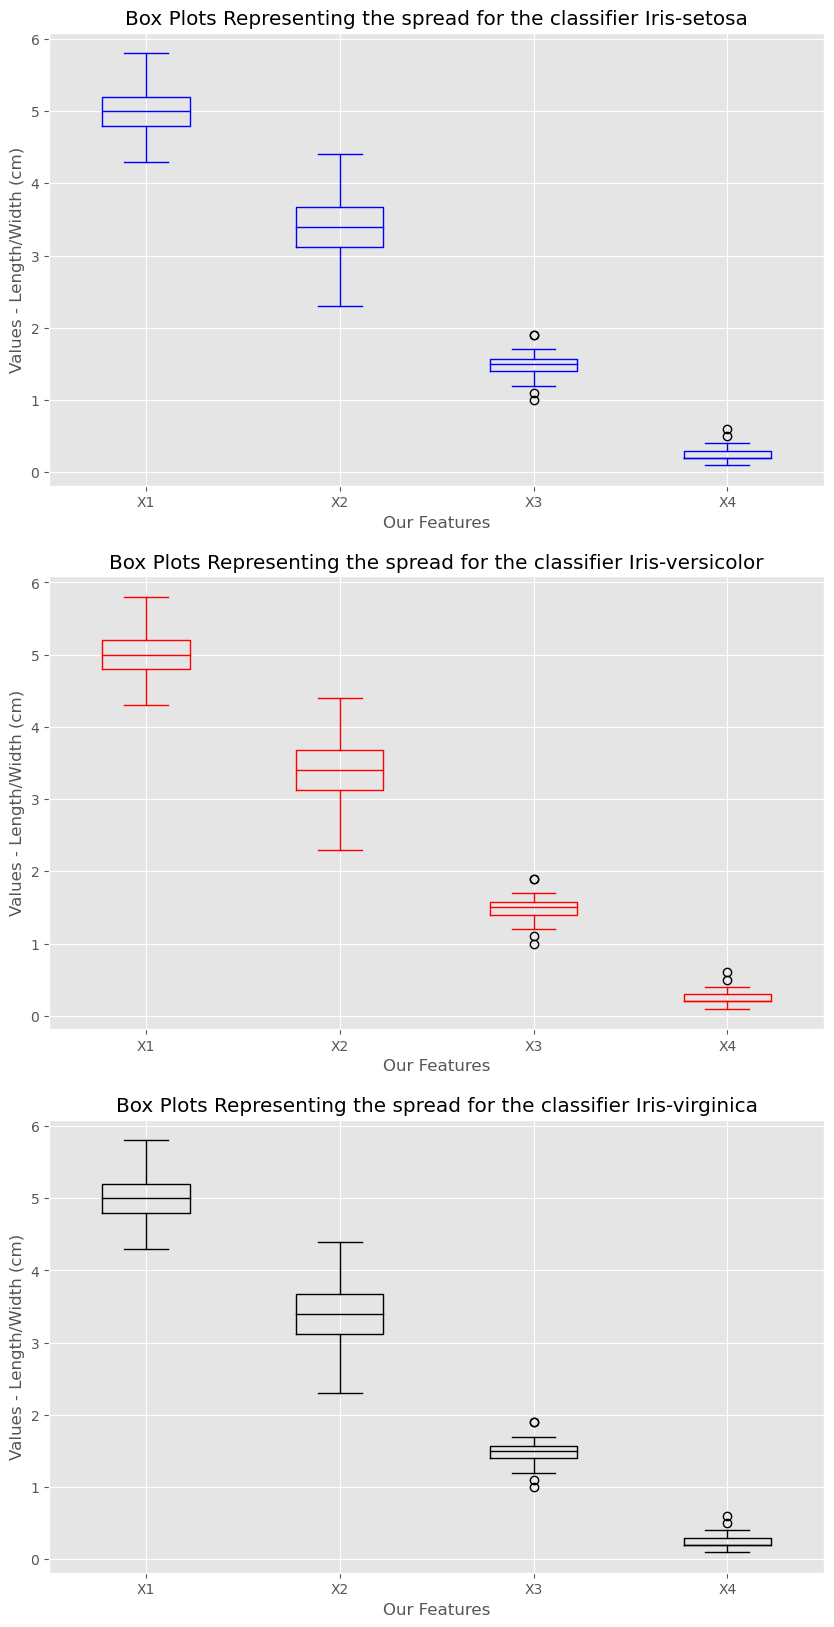

In [15]:
# IRIS-SERTOSA BOX PLOTS 

fig = plt.figure()

ax0 = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

# plot X1 
df1.plot(kind = 'box', color = 'blue', vert = 'True', figsize = (10,20), ax = ax0)
ax0.set_title('Box Plots Representing the spread for the classifier Iris-setosa')
ax0.set_xlabel('Our Features')
ax0.set_ylabel('Values - Length/Width (cm)')

# plot X1 
df1.plot(kind = 'box', color = 'red',  vert = 'True', figsize = (10,20), ax = ax1)
ax1.set_title('Box Plots Representing the spread for the classifier Iris-versicolor')
ax1.set_xlabel('Our Features')
ax1.set_ylabel('Values - Length/Width (cm)')

# plot X1 
df1.plot(kind = 'box', color = 'black', vert = 'True', figsize = (10,20), ax = ax2)
ax2.set_title('Box Plots Representing the spread for the classifier Iris-virginica')
ax2.set_xlabel('Our Features')
ax2.set_ylabel('Values - Length/Width (cm)')

In [16]:
plt.close()


#### Model 1: K - Nearest Neighbours
Here we try to classify our instances by using the K- Nearest Neighbours algorithms. 

In [17]:
from sklearn import preprocessing
# Feature Data
XK = df.columns[:-1]
X = df[XK]
y = df['Y'].values
print(y[:5])
X.head()

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


,X1,X2,X3,X4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Traim Test Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 4) 

print('Trainset:', x_train.shape, y_train.shape)
print('Testset:', x_test.shape, y_test.shape) 

Trainset: (112, 4) (112,)
Testset: (38, 4) (38,)


In [19]:
# Normalising Data 
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train.astype('float'))
x_train_norm[0:5]

array([[ 0.99358328,  0.09437628,  0.48487229,  0.31867931],
       [-0.98475143,  1.77599003, -1.35499283, -1.43225304],
       [ 2.23004248, -0.14585425,  1.31577911,  1.39617613],
       [-1.10839735,  0.81506789, -1.41434332, -1.43225304],
       [ 0.99358328,  0.09437628,  0.30682082,  0.1839922 ]])

In [20]:
# K -Nearest Neighbors Construction 
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm, y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [21]:
# Normalising X test data
x_test_norm = scaler.transform(x_test.astype('float'))
x_test_norm[0:5] 

array([[ 0.62264552, -0.62631533,  1.01902668,  1.12680193],
       [-0.24287591,  1.77599003, -1.29564234, -1.29756593],
       [ 1.85910472, -0.62631533,  1.31577911,  0.85742772],
       [ 2.10639656, -0.14585425,  1.61253155,  1.12680193],
       [ 1.7354588 , -0.38608479,  1.43448009,  0.72274062]])

In [22]:
#Predicting the Model
yhat = neigh.predict(x_test_norm) 
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [23]:
# Model Evaluation 
print(classification_report(y_test, yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.93      0.93      0.93        38
   weighted avg       0.95      0.95      0.95        38



So what can we tell from thid: 
We have a pretty high accuracy level for the data given . This means that the KNN algorithm for K = 3 is a good model for predicting our classifers.

#### Model 2: Decision Tree

In [24]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree 

In [25]:
# Convert catgorical labels to numerical labels
le_Y = preprocessing.LabelEncoder() 
le_Y.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
Y = le_Y.transform(y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# Setting up decision tree

x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y,
                                                   test_size = 0.25,
                                                   random_state = 3)

In [27]:
# Modelling 
plantTree = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth=4)
plantTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
# Fit our model 
plantTree.fit(x1_train,y1_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
# Prediction
predTree = plantTree.predict(x_test) 
print(predTree[:5])
print(y1_test[:5])

[2 0 2 2 2]
[0 0 0 0 0]


In [30]:
# Evaluation 
print(classification_report(y1_test, predTree))

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        15
           1       0.38      0.25      0.30        12
           2       0.25      0.27      0.26        11

    accuracy                           0.32        38
   macro avg       0.32      0.31      0.31        38
weighted avg       0.32      0.32      0.31        38



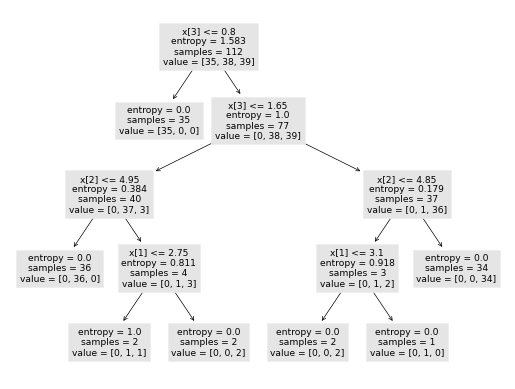

In [31]:
# Plot the model

tree.plot_tree(plantTree)
plt.show()

Please Note: 
* value[0] = 'Iris-setosa'
* value[1] = 'Iris-versicolor'
* value[2] = 'Iris-virginica'

#### Model 3: Logistic Regression 

We will now seek to create a model via logistic regression and see if the model harnests more accuracy We will use our normalised split data from model 1 where the data was split into 0.75 train / 0.25 test.

In [32]:
# Preparing the data
# Feature Data
X = df.iloc[:,[0,1,2,3]].values
y = df['Y'].values
print(X[:5], y[0:5], y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'] (150,)


In [33]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [34]:
# standardisation 
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train.astype('float'))
print(x_train[0:5], x_train.shape)

scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test.astype('float'))
print(x_test[0:5], x_test.shape)

[[ 0.01543995 -0.11925475  0.22512685  0.35638175]
 [-0.09984503 -1.04039491  0.11355956 -0.02864805]
 [ 1.05300481 -0.11925475  0.95031423  1.12644135]
 [-1.36797986  0.34131533 -1.39259884 -1.31208072]
 [ 1.1682898   0.11103029  0.72717965  1.38312788]] (112, 4)
[[ 0.12564197 -0.6117992   0.88098019  1.81979323]
 [ 0.42404164 -2.0207913   0.21386113 -0.1846167 ]
 [-0.32195754  2.67584903 -1.36296573 -1.32999381]
 [ 2.36363949 -0.37696718  1.60874643  0.9607604 ]
 [-1.06795671  0.7971929  -1.30231854 -1.32999381]] (38, 4)


In [35]:
# Importing moduels 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [36]:
# Modelling we use c = 0.01 as we want there to be stronger regulation 
LR = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto').fit(x_train, y_train) 
LR

LogisticRegression(random_state=0)

In [37]:
# Prediction 
yhat = LR.predict(x_test)
yhat[0:5]
yhat.shape

(38,)

In [38]:
# Probablity Prediction
yhat_prob = LR.predict_proba(x_test) 
yhat_prob[0:5]

array([[1.59575798e-05, 8.64128968e-03, 9.91342753e-01],
       [2.70321157e-03, 9.26416712e-01, 7.08800761e-02],
       [9.95405586e-01, 4.59435303e-03, 6.05318571e-08],
       [1.61928849e-06, 2.77959082e-02, 9.72202472e-01],
       [9.78499242e-01, 2.15001317e-02, 6.26216506e-07]])

In [39]:
# Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)
print('Logistic Regression accuracy:', metrics.accuracy_score(y_test , yhat))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Logistic Regression accuracy: 0.9736842105263158


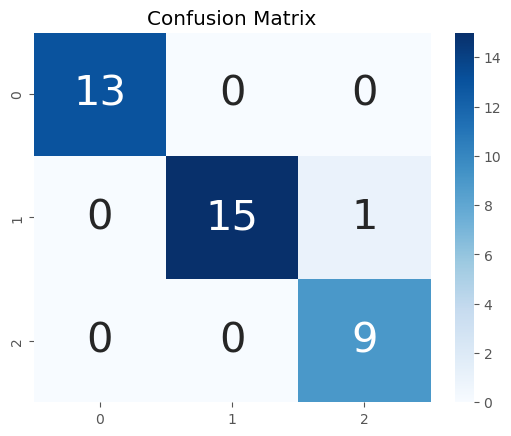

In [40]:
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

#### Model 4 : Support Vector Machines

In [41]:
# Importing moduels
from sklearn.metrics import f1_score
from sklearn import svm

In [42]:
# Model Building 
rbf = svm.SVC(kernel = 'rbf', gamma = 0.5, C = 0.1).fit(x_train,y_train) 
yhat1 = rbf.predict(x_test)

poly = svm.SVC(kernel = 'poly', degree = 3, C = 1).fit(x_train, y_train)
yhat2 = poly.predict(x_test)

print(yhat1[:5])
print(yhat2[:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [43]:
# Evaluation
print(classification_report(y_test, yhat1))
print(classification_report(y_test, yhat2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.62      0.77        16
 Iris-virginica       0.60      1.00      0.75         9

       accuracy                           0.84        38
      macro avg       0.87      0.88      0.84        38
   weighted avg       0.91      0.84      0.84        38

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [44]:
#For Rbf 
cm = confusion_matrix(y_test, yhat1)
print(cm)

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


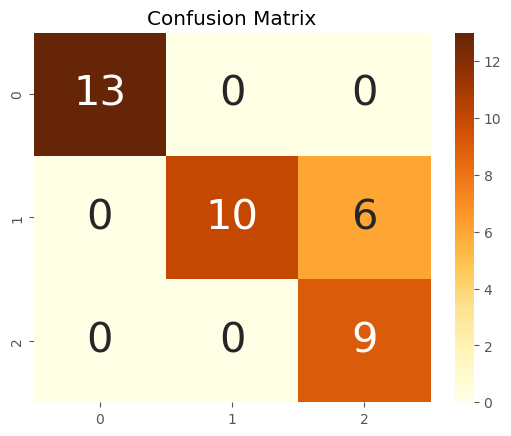

In [45]:
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="YlOrBr", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [46]:
#For Poly
cm = confusion_matrix(y_test, yhat2)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


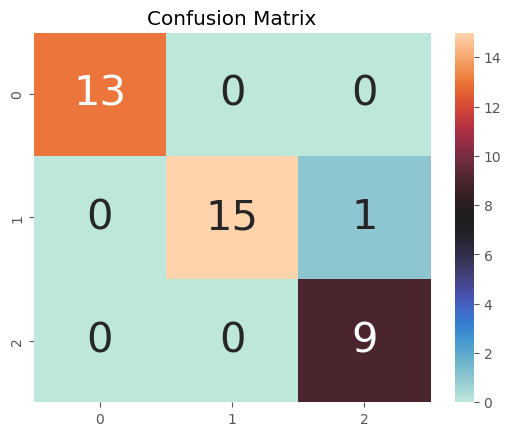

In [47]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="icefire", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()